# <font color='orange'>Numerical Exercise 2</font>


## <font color='blue'>Exercise 02.1</font>
The purpose of this exercise is to compute the integral

\begin{equation}
  I = \int_0^1 dx \ \frac{\pi}{2}\cos\Big(\frac{\pi}{2} x\Big) = 1  \tag{$\star$}
  \label{eq:MC_quadrature}
\end{equation}

using Monte Carlo quadrature. The first way for doing this is to sample $ M=10^4 $ random numbers $ \{x_i\}_{i=1}^M $ uniformly distributed in $ [0, 1) $ and estimate the integral in the following manner:

\begin{align}
    I & = \int_a^b dx f(x) = \lim_{M\to\infty} \sum_{i=1}^M \Delta x f(x_i) \\
      & \sim (b-a) \langle f \rangle_{[a, b]} = (b-a) \frac{1}{M} \sum_{i=1}^M f(x_i)
\end{align}

where 

\begin{align}
    & f(x) = \frac{\pi}{2} \cos\Big(\frac{\pi}{2} x\Big) \\
    & a = 0, b = 1
\end{align}

The second way proposed by the exercise is to use the **importance sampling** technique: rewriting the integral \eqref{eq:MC_quadrature} as

$$ I = \int_a^b dx f(x)p(x) $$

this method consists in introducing a different probability distribution $ d(x) $ and calculate 

$$ I = \int_a^b dx \ \dfrac{f(x)p(x)}{d(x)} d(x) $$

as in the previous case, but using $ \dfrac{f(x)p(x)}{d(x)} $ as the integrand function and sampling $ M=10^4 $ random numbers $ \{x_i\}_{i=1}^M $ distributed according to $ d(x) $. We will be able to decrease the variance related to the estimation of $ I $ by choosing $ d(x) $ similar to the original integrand function $ f(x)p(x) $.
I choose 

$$ d(x) = 2 \big( 1-x \big) $$

taking the above into account, as it can be seen from the figure at the bottom right.

<img src="02.1/d(x).png" width="400" align='right'>
Once the new probability distribution is chosen, I procede with the Monte Carlo quadrature: I sample each $ x_i $ according to $ d(x) $, using the method of the inversion of the cumulative distribution

$$ x_i = 1 - \sqrt{1-y_i} $$

with $ y_i $ uniformly distributed in $ [0, 1) $. Obviously the choice I make with respect to the new pdf $ d(x) $ is closely linked to the possibility to easily reverse the cumulative distribution function; this factor may be a limitation in the case of more complex integrals. I finally estimate the integral as 

$$ I \cong (b-a) \frac{1}{M} \sum_{i=1}^M \frac{f(x_i)}{d(x_i)} $$

I use the blocking method with $ N_{blk} = 100 $ to estimate the mean value and the statistical uncertainty of $ I $. I show my results below.

In [1]:
#Modules
from math import pi, sqrt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()"> Show/Hide code cells </a>.''')

In [2]:
#In the case of single graphs in the figure
#I set the central alignment
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

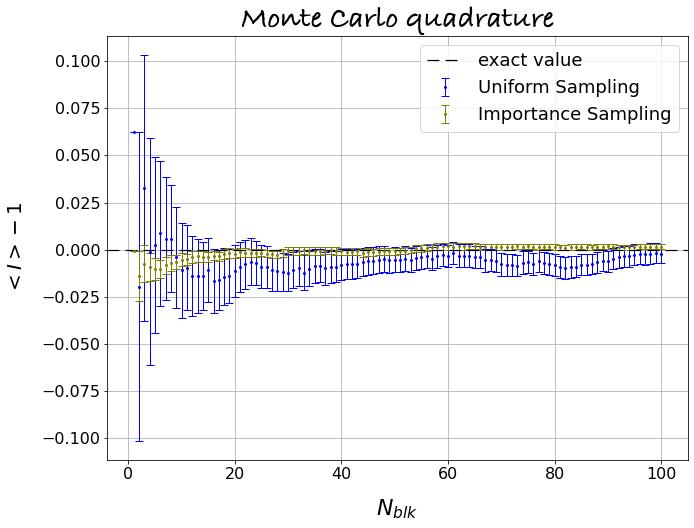

In [3]:
#load the data
N, I_uniform, err_I_uniform=np.loadtxt("02.1/I_uniform.dat", usecols=(0,1,2), unpack=True)
N, I_importance, err_I_importance=np.loadtxt("02.1/I_importance.dat", usecols=(0,1,2), unpack=True)

#plots
plt.figure(figsize=[10.4, 7.8]) #deafult (6.4,4.8)
plt.title('Monte Carlo quadrature', fontname = 'Bradley Hand', fontsize=30)
plt.xlabel('$N_{blk}$', fontsize=22, labelpad=15)
plt.ylabel('$<I>-1$', fontsize=20, labelpad=15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.errorbar(N, I_uniform-1, yerr=err_I_uniform, fmt='o', color='blue',
             elinewidth=1., markersize=2, capsize=4, label='Uniform Sampling')
plt.errorbar(N, I_importance-1, yerr=err_I_importance, fmt='o', color='olive',
             elinewidth=1., markersize=2, capsize=4, label='Importance Sampling')
plt.axhline(y=0, color='k', linewidth=1.2, linestyle='--', dashes=(10, 5), label='exact value')
plt.legend(fontsize=18, loc='best')
plt.grid(True)
plt.show()

As we can see from the graph, both quadratures correctly estimate the integral; moreover the importance sampling technique clearly reduces statistical uncertainty, making the estimation more accurate.

## <font color='blue'>Exercise 02.2</font>
This exercise consists in simulating a $3$-dimensional discrete-time random walk (**RW**) in two different situations

- **on the cubic lattice $\mathbb{Z}^3$** <br> Starting from the origin $ {\vec{r}}_{t=0} = 
  \big( x, y, z \big) = \big( 0, 0, 0 \big) $, 
  I choose randomly one of the three possible directions to move in by generating an
  integer random number between $ 1 $ and $ 3 $ ($ 1 \rightarrow \hat{x} $, $ 2 \rightarrow \hat{y} $, 
  $ 3 \rightarrow \hat{z} $); then I choose randomly whether to go forward or backward in that direction by 
  generating a real random number between $ 0 $ and $ 1 $, i.e. if this number is smaller than $ \frac{1}{2} $ 
  I go forward, otherwise backward.
  At this point I move the walker with a step of length equal to the lattice spacing $ a $ (set to $ 1.0 $ cm) 
  and update its position to $ \vec{r}_t $ after this discrete time step;
  

- **in the continuum $\mathbb{R}^3$** <br> In this case choose a direction along which to move means to sample
  uniformly a $ 3d $ solid angle; therefore I easily generate a random angle $ \phi $ uniformly in 
  $ [0, 2\pi] $, while for the sampling of the polar angle $ \theta $ in $ [0, \pi] $ I use the usual method of
  the inversion of the cumulative function, being distributed according to
  
  $$ p(\theta) = \frac{1}{2} \sin(\theta) $$
  
  So I get the right sampling using the formula
  
  $$ \theta = \arccos(1-2y) $$
  
  with $ y $ uniformly distributed in $ [0, 1) $. Once chosen the direction, I proceed as in 
  the previous case, moving one step of length $ a $ at each discrete time, always starting from the origin.
 
I show the behaviour of the root of the mean quadratic displacement $ \sqrt{\langle |\vec{r}_t|^2 \rangle_{RW}} $ for both the previous cases as a function of the discrete time step $ t \in [0, 100] $, repeating the walks $ M=10^4 $ times and calculating the statistical uncertainty with the usual blocking methods. <br>
I show also two particular sampled paths done by the walker below, one for each of the two cases described above.

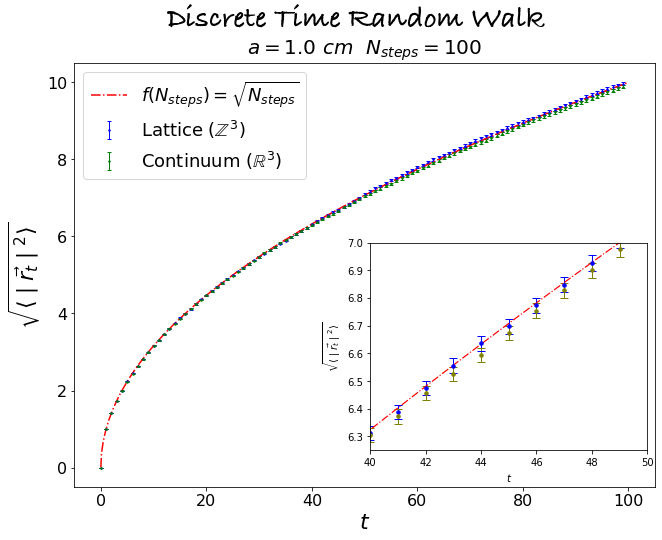

In [4]:
#load the data
N_steps=np.arange(0, 100)
r2_latt, err_latt=np.loadtxt('02.2/RW_lattice.dat', usecols=(0, 1), unpack=True)
r2_cont, err_cont=np.loadtxt('02.2/RW_continuum.dat', usecols=(0, 1), unpack=True)
#Looking for a Diffusive behavior
lnspc=np.linspace(0, 100, 1000)
y=np.sqrt(lnspc)

#plots
fig = plt.figure(figsize=[10.4, 7.8]) #deafult (6.4,4.8)
plt.suptitle('Discrete Time Random Walk', fontname = 'Bradley Hand', fontsize=30)
plt.title('$a=1.0 \\ cm \\ \\ N_{steps}=100$', fontname = 'Bradley Hand', fontsize=20)
plt.xlabel('$t$', fontsize=22)
plt.ylabel('$\sqrt{\langle {\mid \\vec{r_t} \mid}^2 \\rangle}$', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.errorbar(N_steps, r2_latt, yerr=err_latt, fmt='ob', elinewidth=1.,
             markersize=1.5, capsize=2, label='Lattice ($\mathbb{Z}^3$)')
plt.errorbar(N_steps, r2_cont, yerr=err_cont, fmt='og', elinewidth=1.,
             markersize=1.5, capsize=2, label='Continuum ($\mathbb{R}^3$)')
plt.plot(lnspc, y, color='r', label='$f(N_{steps})=\sqrt{N_{steps}}$', lw=1.5, linestyle='dashdot')
plt.legend(fontsize=18, loc='best')

                  #[left, bottom, width, height]
ins = fig.add_axes([0.52, 0.19, 0.37, 0.37])
ins.errorbar(N_steps, r2_latt, yerr=err_latt, fmt='ob', elinewidth=1.,
             markersize=3.5, capsize=4, label='Lattice ($\mathbb{Z}^3$)')
ins.errorbar(N_steps, r2_cont, yerr=err_cont, fmt='o', color='olive',
             elinewidth=1., markersize=3.5, capsize=4, label='Continuum ($\mathbb{R}^3$)')
ins.plot(lnspc, y, color='r', label='$f(N_{steps})=\sqrt{N_{steps}}$', lw=1.2, linestyle='dashdot')
plt.xlabel('$t$')
plt.ylabel('$\sqrt{\langle {\mid \\vec{r_t} \mid}^2 \\rangle}$')
plt.axis([40, 50, 6.25, 7])

plt.show()

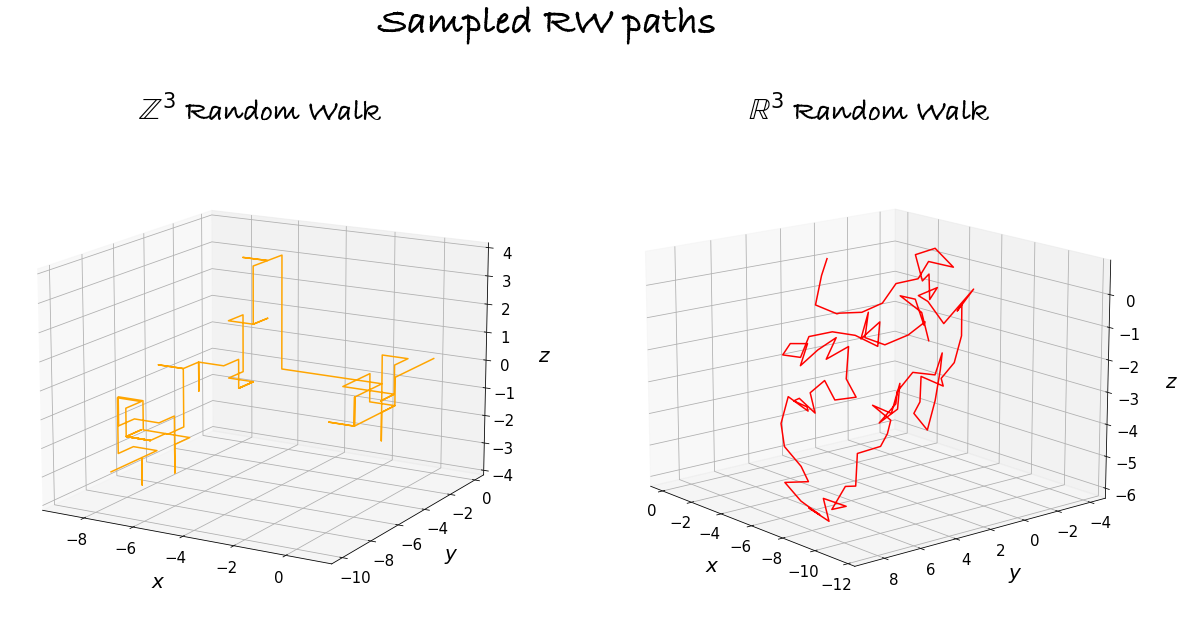

In [5]:
################################
#Sampled paths
################################
#load the data
x_latt, y_latt, z_latt=np.loadtxt("02.2/path_lattice.dat",  usecols=(0,1,2), unpack=True)
x_cont, y_cont, z_cont=np.loadtxt("02.2/path_continuum.dat",  usecols=(0,1,2), unpack=True)
print('\n\n')

#plots
plt.figure(figsize=[20, 15])  #deafult (6.4,4.8)
plt.suptitle('Sampled RW paths', y=0.85, fontname = 'Bradley Hand', fontsize=40)

ax = plt.subplot(1, 2, 1, projection ="3d")
ax.set_title('$\mathbb{Z}^3$ Random Walk', fontname = 'Bradley Hand', fontsize=30)
ax.plot(x_latt, y_latt, z_latt, zdir='z', color='orange')
ax.set_xlabel('$x$', fontsize=20, labelpad=15)
ax.set_ylabel('$y$', fontsize=20, labelpad=15)
ax.set_zlabel('$z$', fontsize=20, labelpad=15)
ax.view_init(15)
ax.tick_params(labelsize=15)

ax = plt.subplot(1, 2, 2, projection ="3d")
ax.set_title('$\mathbb{R}^3$ Random Walk', fontname = 'Bradley Hand', fontsize=30)
ax.plot(x_cont, y_cont, z_cont, zdir='z', color='red')
ax.set_xlabel('$x$', fontsize=20, labelpad=15)
ax.set_ylabel('$y$', fontsize=20, labelpad=15)
ax.set_zlabel('$z$', fontsize=20, labelpad=15)
ax.view_init(15, 140)
ax.tick_params(labelsize=15)

plt.show()

The graph above shows how the diffusive behavior typical of the RW is captured by my simulation, both in the lattice and in the continuum case, i.e. on average the displacement done by the walker is proportional to the root of the discrete time step $ t $ (<font color='red'>red dashdot line</font>).<br>
As the calculated uncertainties are very small, I zoom in on a region of the curve (bottom right frame) to highlight the accuracy of the results.